 # <center> MITgcm Channel </center> #

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline


In [3]:
# Some parameters
Full = 'Y'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

# <center> Flat Bottom  </center> #

In [4]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

$\bar U$

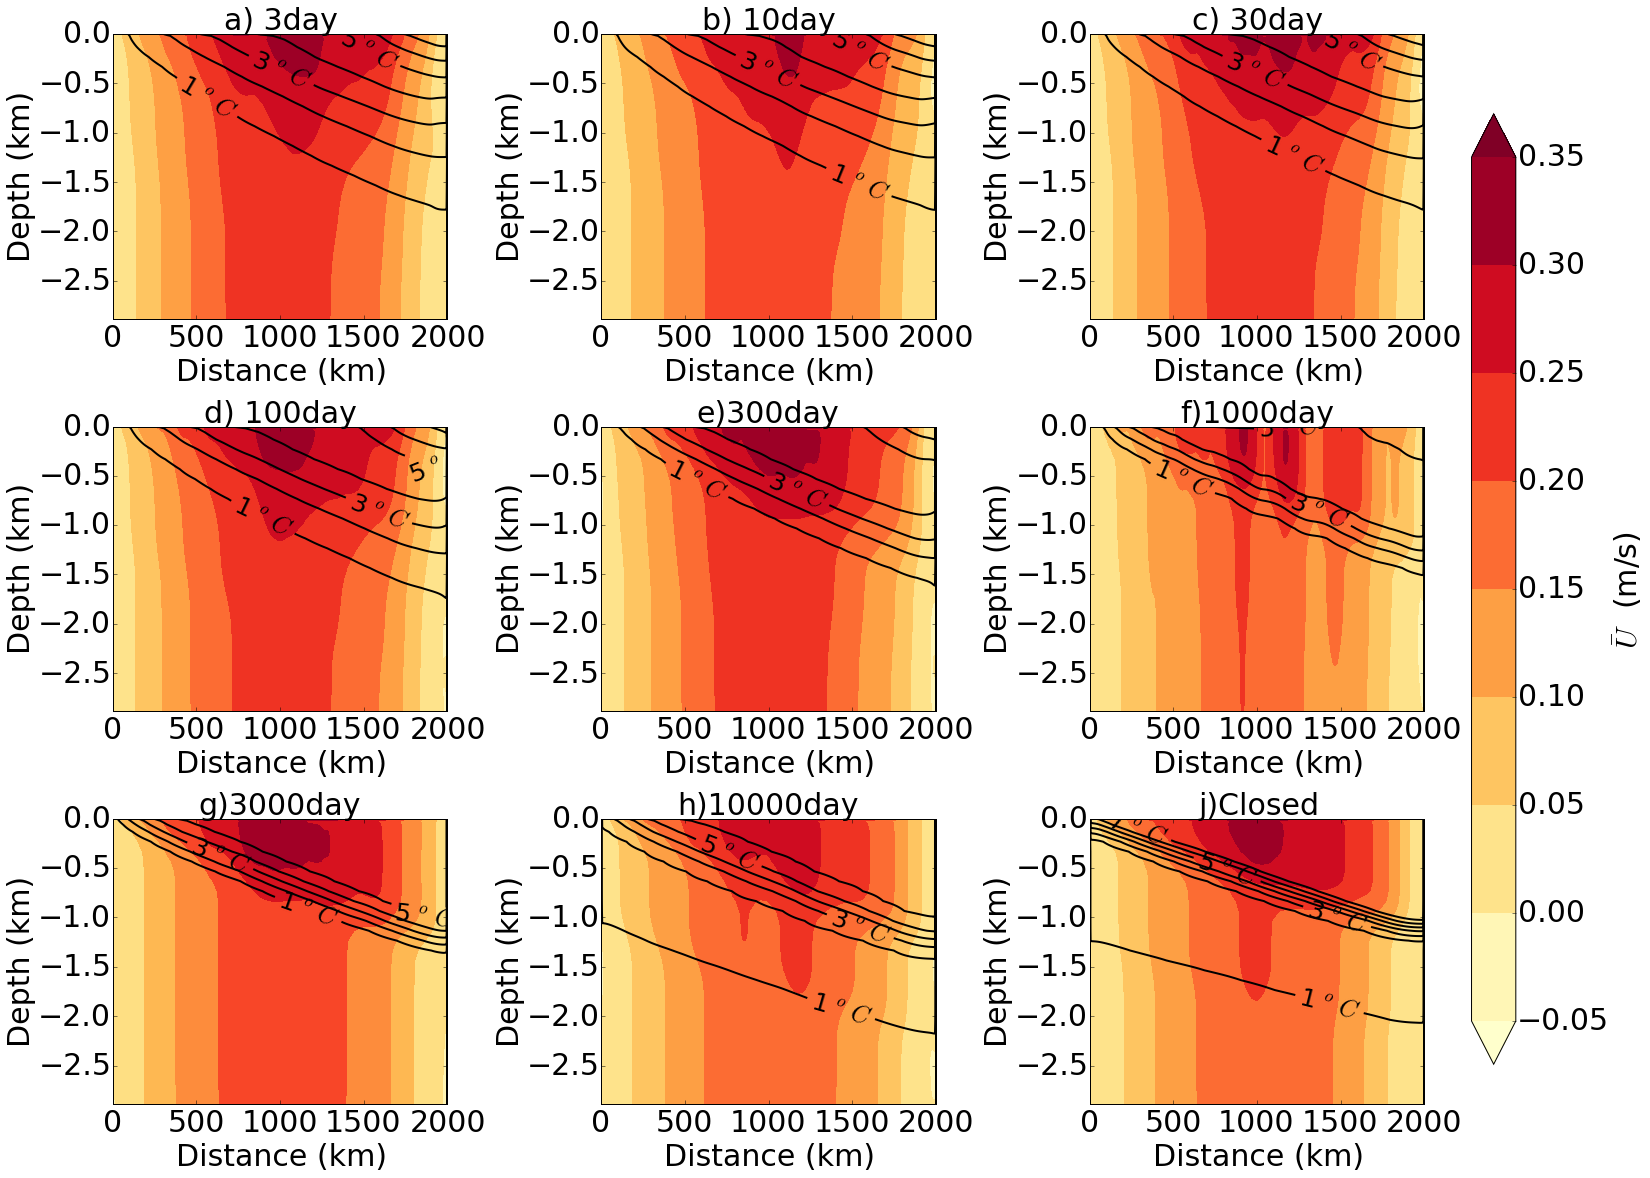

In [58]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0.2, .355, .05)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Depthav =  c.depth_average(c.ugrid_to_cgrid(c.mnc('Tav.nc','UVEL')))
    BarotropicU = tile(Depthav,(c.Nz,1,1))
    baroclinic = (c.ugrid_to_cgrid(U*c.HFacW)-BarotropicU)
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(3, 3, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              Ubar, cmap=cm.YlOrRd,extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\bar U$  (m/s)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

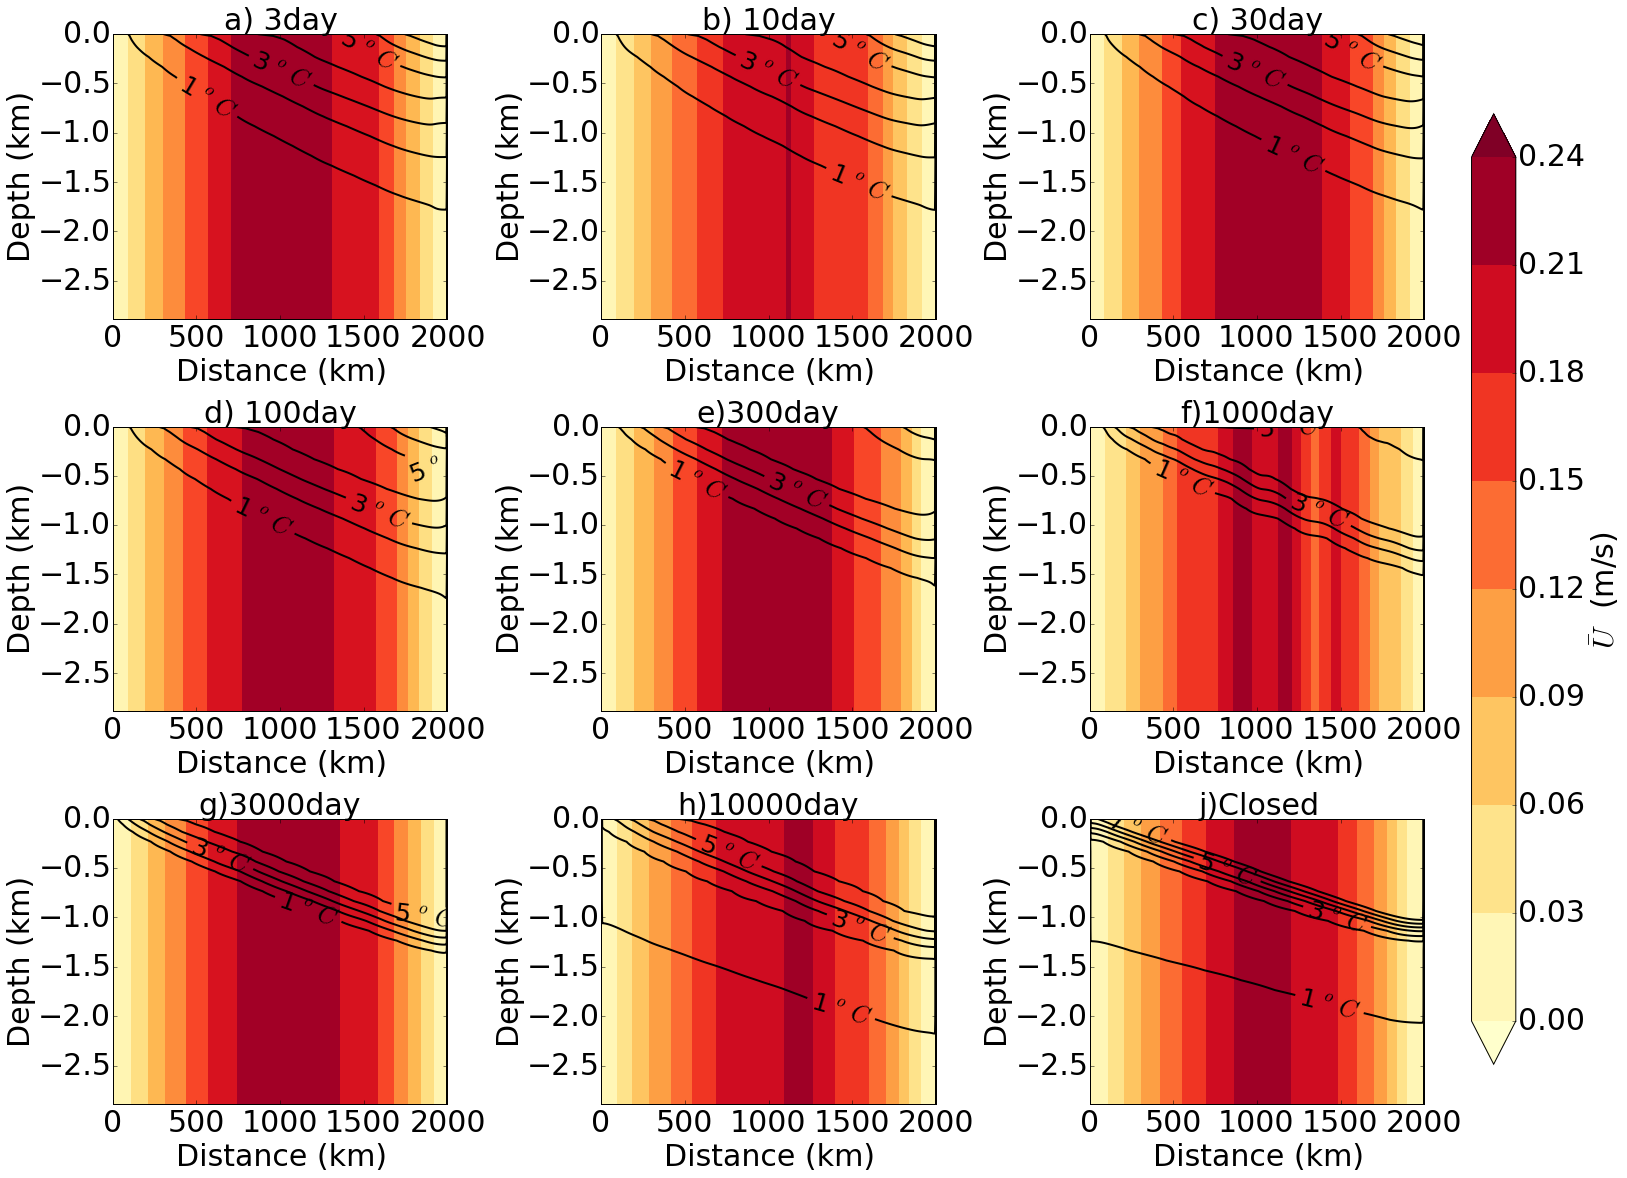

In [61]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0.2, .355, .05)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Depthav =  c.depth_integrate(c.ugrid_to_cgrid(c.mnc('Tav.nc','UVEL')))/c.H
    BarotropicU = tile(Depthav,(c.Nz,1,1))
    baroclinic = (c.ugrid_to_cgrid(U*c.HFacW)-BarotropicU)
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(3, 3, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              BarotropicU.mean(axis=2), cmap=cm.YlOrRd,extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\bar U$  (m/s)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

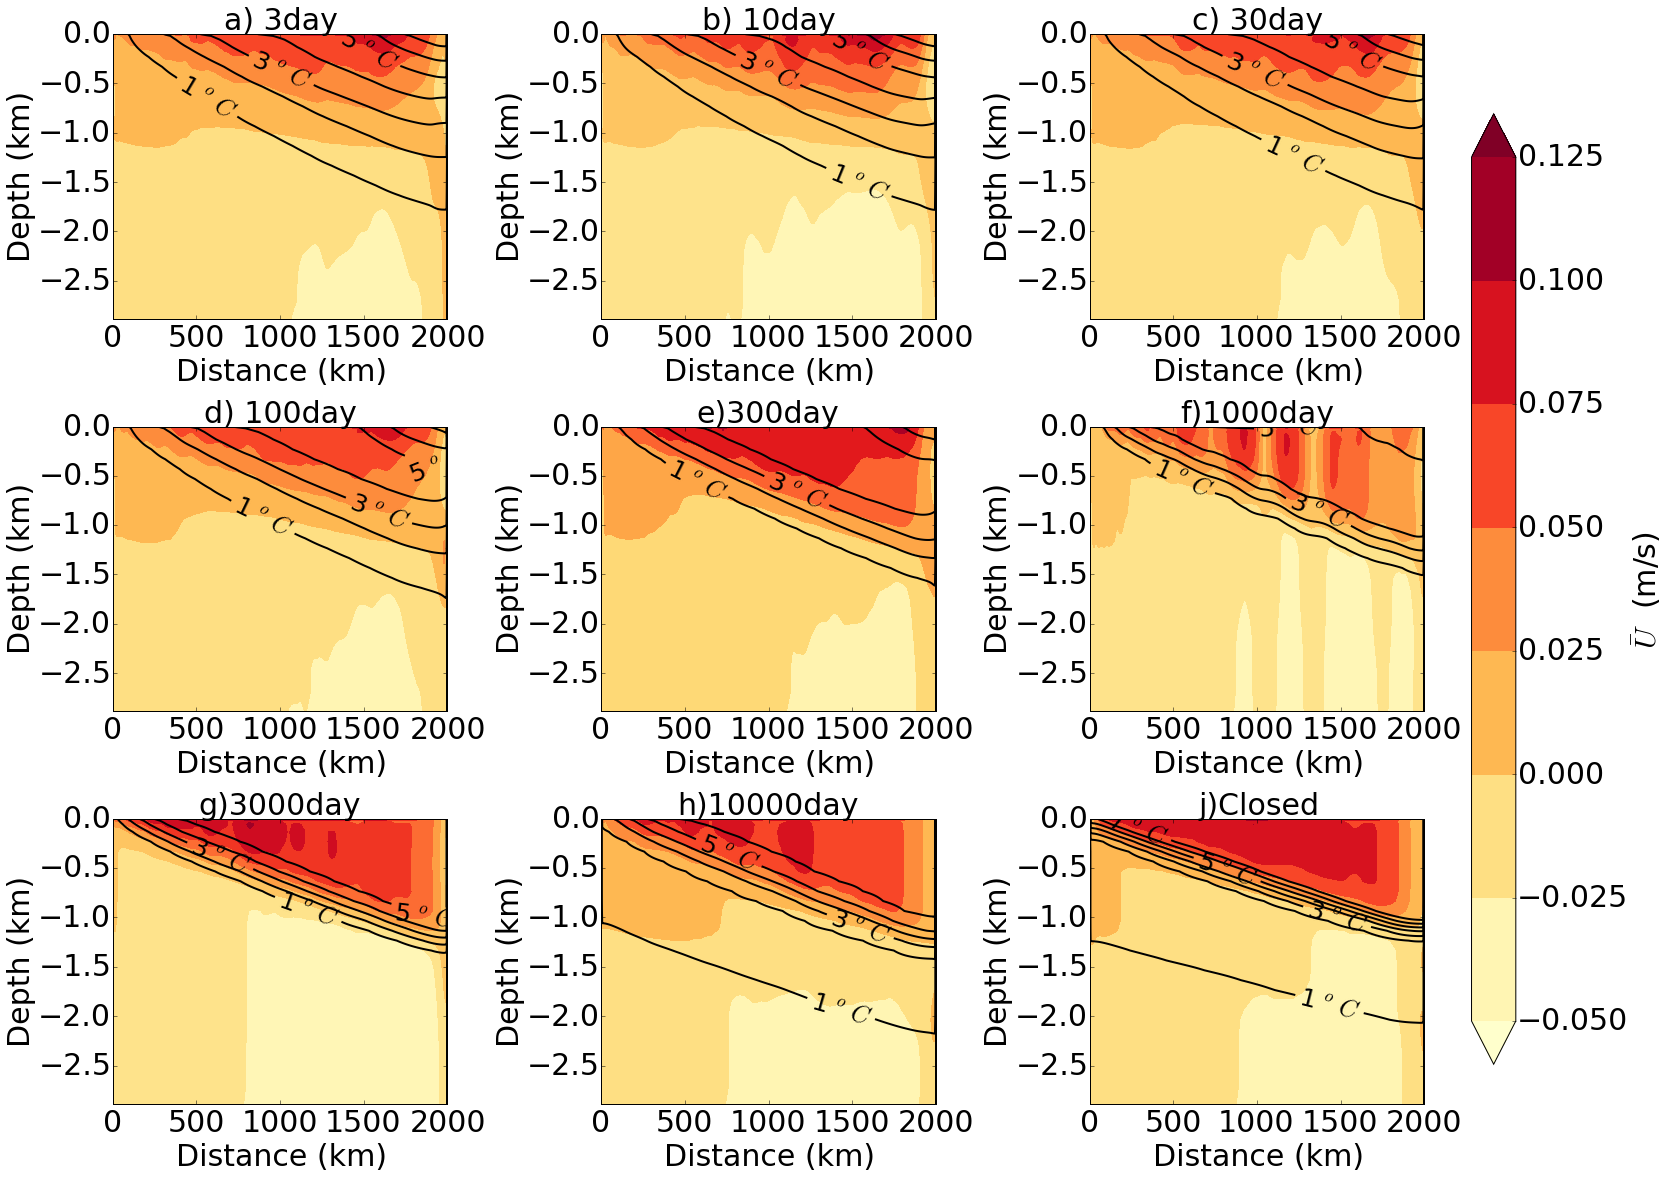

In [62]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0.2, .355, .05)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    U = c.mnc('Tav.nc','UVEL')
    Depthav =  c.depth_integrate(c.ugrid_to_cgrid(c.mnc('Tav.nc','UVEL')))/c.H
    BarotropicU = tile(Depthav,(c.Nz,1,1))
    baroclinic = (c.ugrid_to_cgrid(U*c.HFacW)-BarotropicU)
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(3, 3, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              baroclinic.mean(axis=2), cmap=cm.YlOrRd,extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\bar U$  (m/s)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

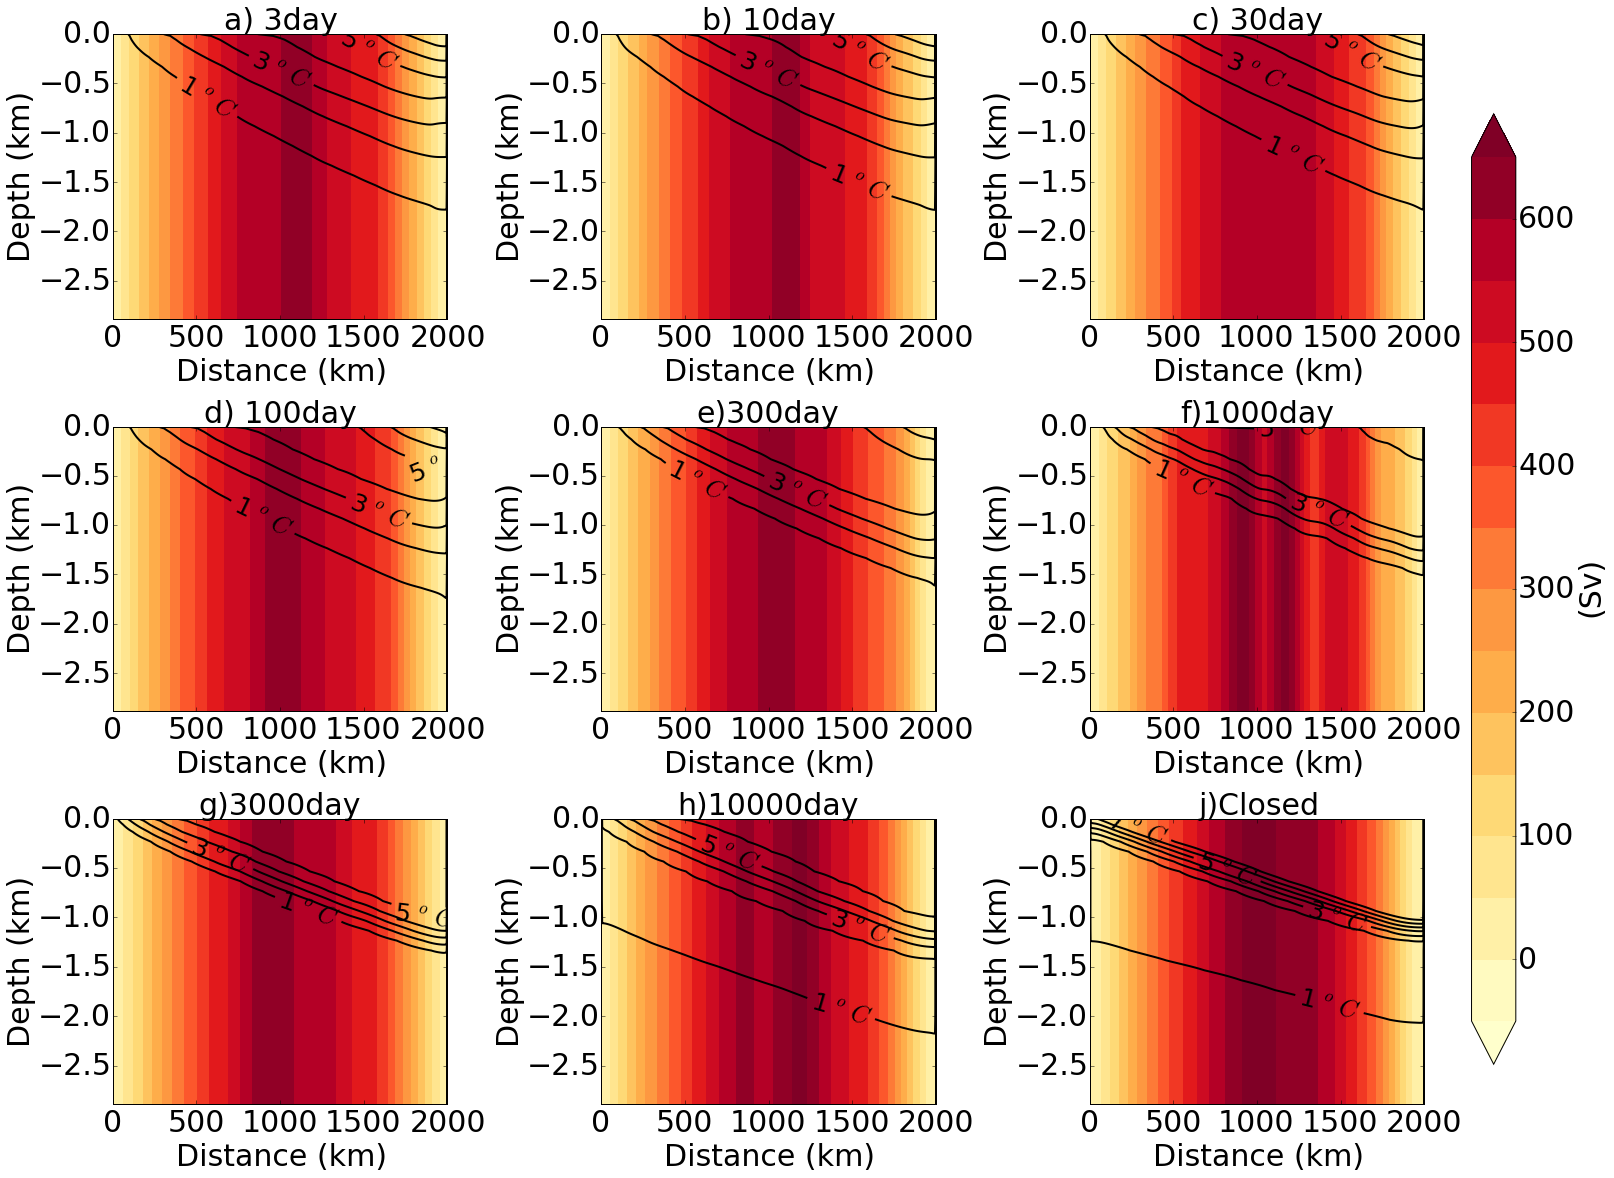

In [91]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-50, 700, 50)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    U = c.mnc('Tav.nc','UVEL')
    Depthav =  c.depth_integrate(c.ugrid_to_cgrid(c.mnc('Tav.nc','UVEL')))
    BarotropicU = tile(Depthav,(c.Nz,1,1))
    
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(3, 3, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              BarotropicU.mean(axis=2)*c.Lx/10**6 , Psi_levs, cmap=cm.YlOrRd, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'(Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

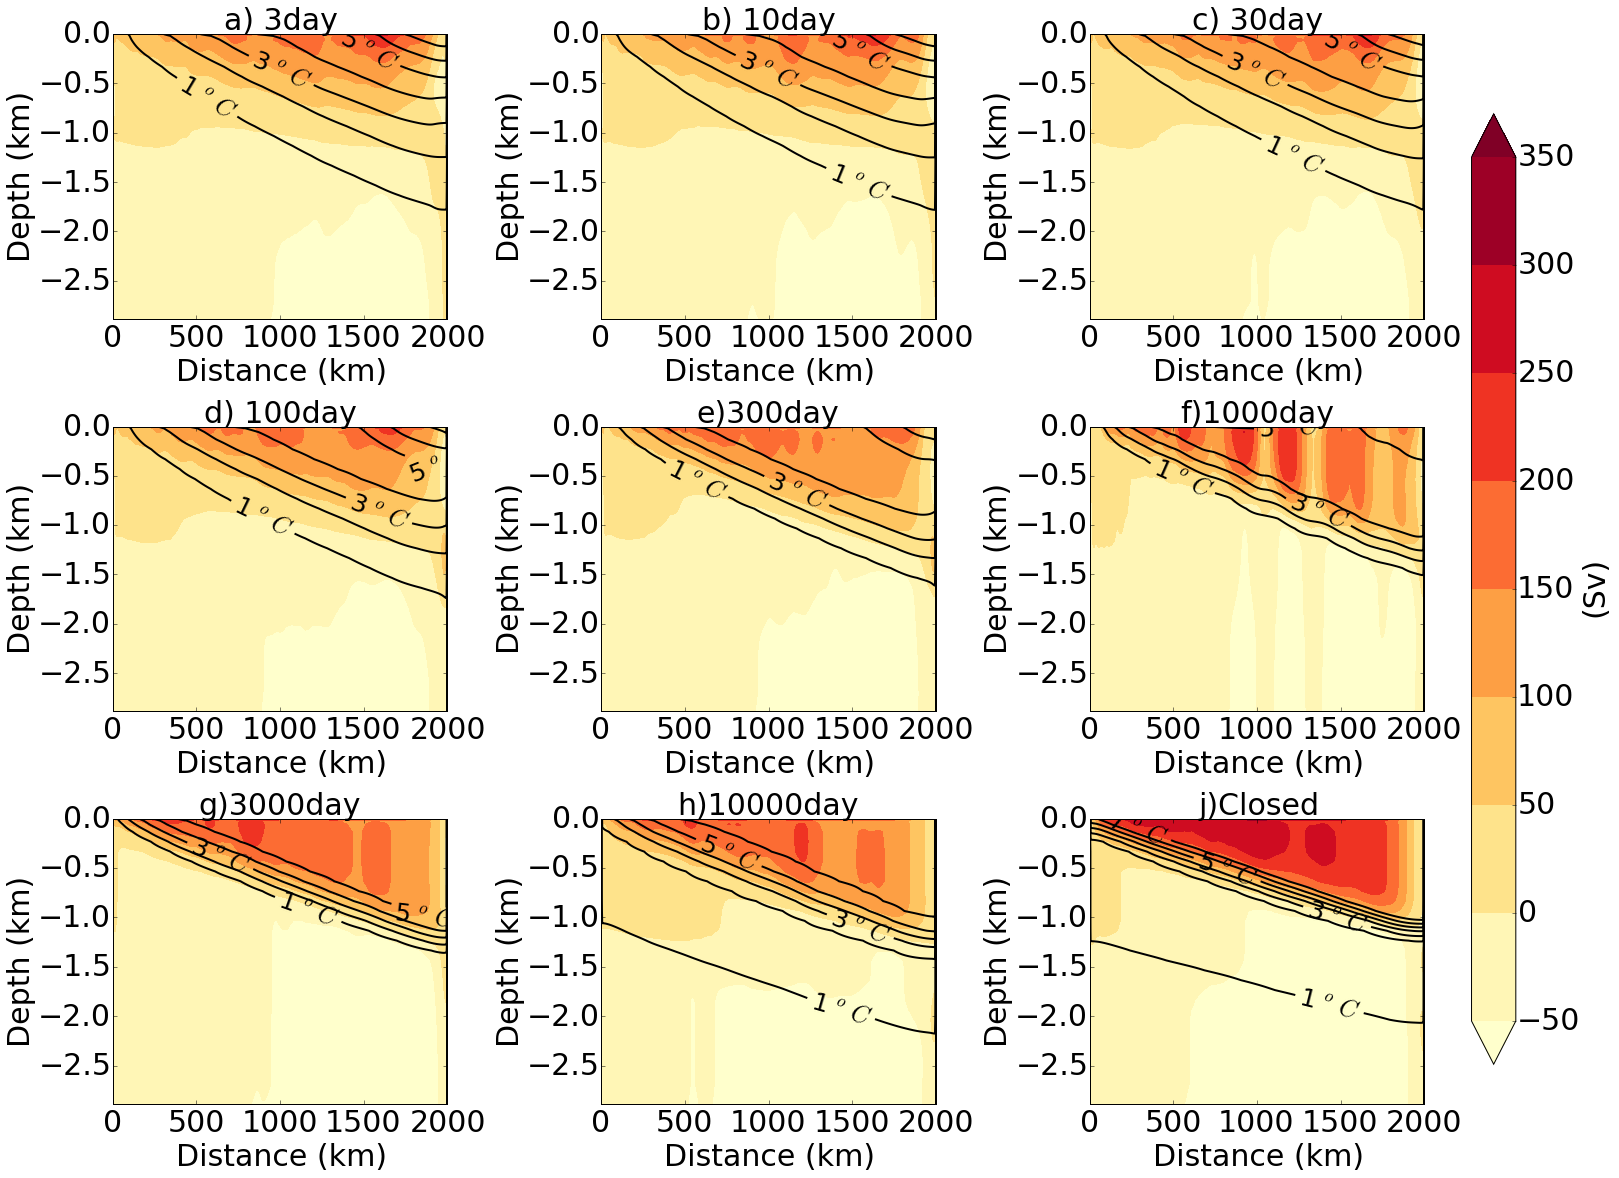

In [98]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-50, 400, 50)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    U = c.mnc('Tav.nc','UVEL')
    Depthav =  c.depth_integrate(c.ugrid_to_cgrid(c.mnc('Tav.nc','UVEL')))/c.H
    BarotropicU = tile(Depthav,(c.Nz,1,1))
    baroclinic = (c.ugrid_to_cgrid(U*c.HFacW)-BarotropicU)
    dint = baroclinic*c.H
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(3, 3, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              dint.mean(axis=2)*c.Lx/10**6, Psi_levs, cmap=cm.YlOrRd, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'(Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

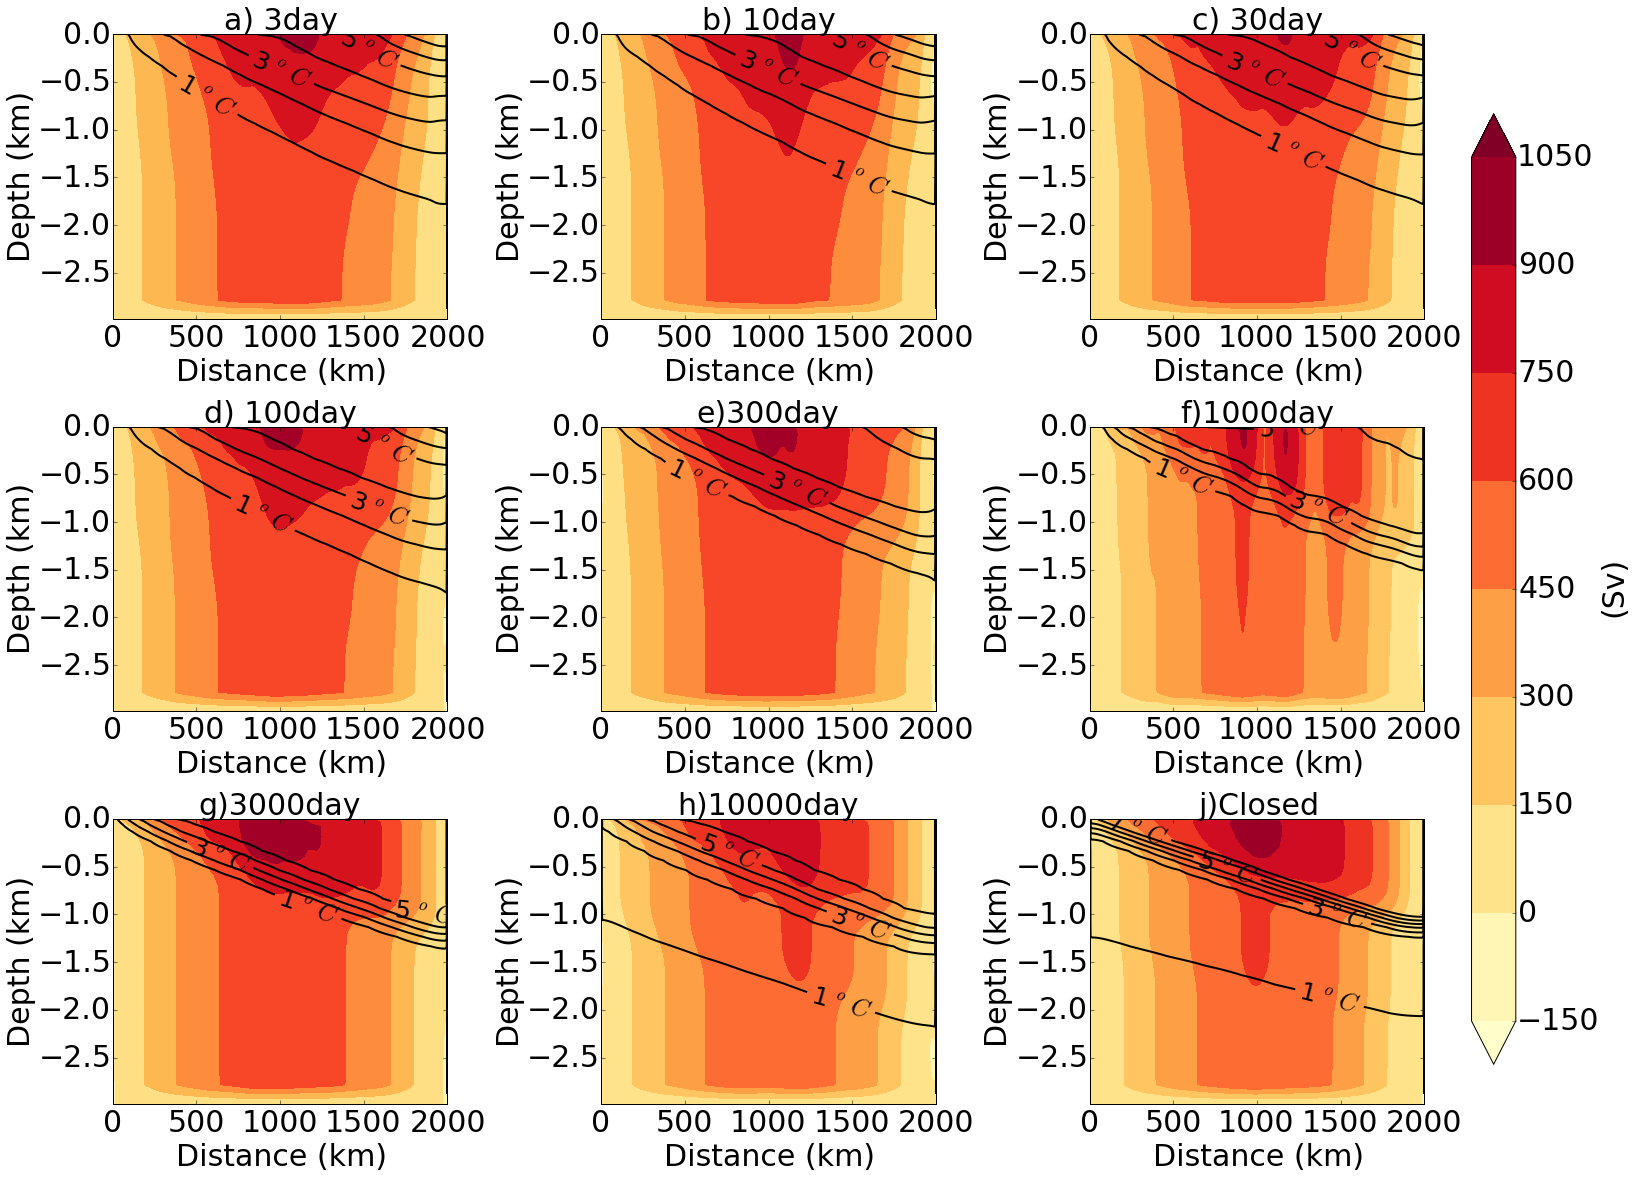

In [96]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-50, 700, 50)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    U = c.mnc('Tav.nc','UVEL')
    Uzone = np.nanmean(U, axis=2)*c.Lx
    # Got rid of for loop here (much quicker!!)
    psi2 = np.apply_along_axis(np.multiply, 0, Uzone, c.dzf)
    psi = Uzone*c.H
    npad = ((0, 1), (0, 0))
    # Pad with zeros at bottom
    psi = np.pad(psi, pad_width=npad, mode='constant',
                 constant_values=0)
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(3, 3, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zf/1000,
              psi/10**6, cmap=cm.YlOrRd, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'(Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

***
**ACC Transport:**

The ACC is set by a number of factors: Wind Stress ($\tau$), Surface buoyancy forcing and remote forcing altering stratification:
Transport given by:
\begin{equation}
T=\iint u \mathrm{d}z\mathrm{d}y
\end{equation}
If you substitute thermal wind into the above equation where thermal wind is given as:
\begin{equation}
u_z=\frac{u_z}{f\rho_0}\rho_y
\end{equation}
Transport can be given by:
\begin{equation}
T=\frac{g}{f\rho_0}\iint \rho_N -\rho_S \, \mathrm{d}z^2
\end{equation}

Which looks like the ACC strength could be set by stratification. Hogg 2010 showed that you can drive the ACC without $\tau$. Marshall and Radko 2003 suggested transport depends on the wind stress and buoyancy difference. 

With no diabatic forcing form stress balances wind stress (Ward 2011) so $\tau\,=\,S_{bottom}$ where $S_{bottom}$ is independent of mean flow

When diabetic terms are taken into account the there may be a feedback with the meridional layer volume transport - feedbacks with ACC and overturning?

***

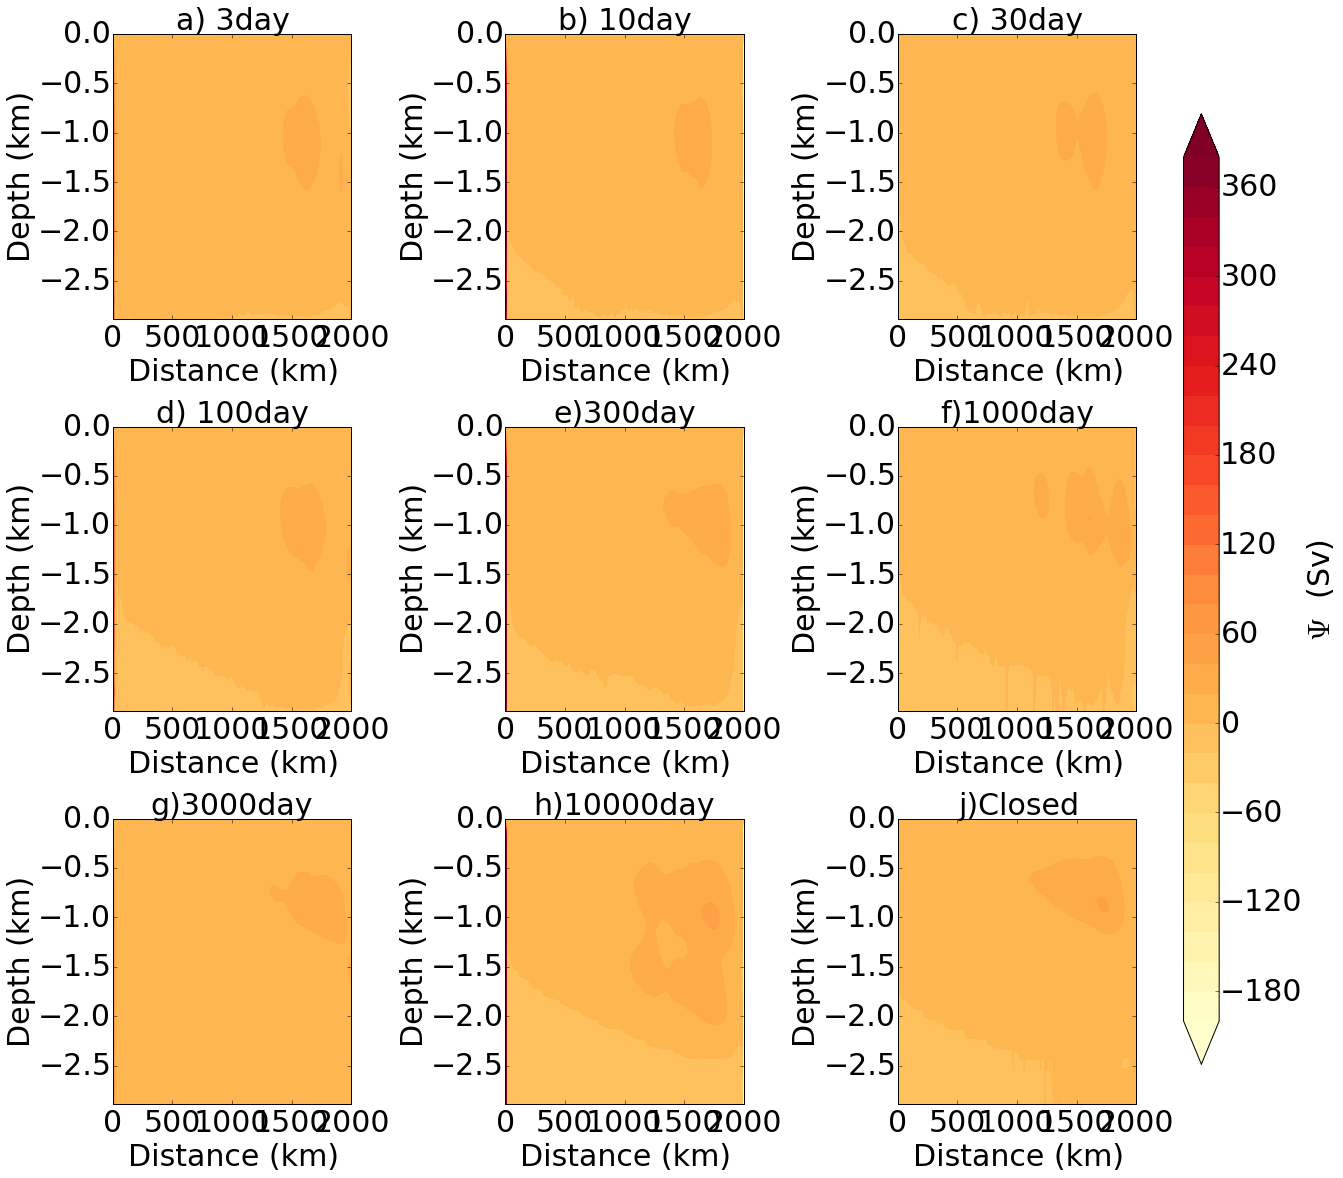

In [25]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-200, 400, 20)
Psi_ticks =np.arange(0., 800., 100.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELStile(self.dyc, (Nz,1))
    Tavlat = c.get_zonal_avg('Tav.nc','THETA')
    DT = c.ddy_cgrid_centered(Tavlat)
    DTdz=DT*(tile(c.zc*c.dzf,(c.Ny,1)).T)
    Baroc = np.cumsum(DTdz[::-1,:],axis=0)[::-1,:]*(tile(c.zc*c.dzf,(c.Ny,1)).T)
    ax = fig.add_subplot(3, 3, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              Baroc*(9.81/(1000*10**-4))/10**6, Psi_levs, cmap=cm.YlOrRd,extend='both')

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)